In [50]:
import cv2
import numpy as np
import glob  # for read file from folder
import time  # for estimate processing time(optional)
import matplotlib.pyplot as plt

In [51]:
def load_all_image_from_path(path, template):
    image_list = []
    for filename in glob.glob(path):
        # load image in gray scale
        print(filename)
        RESCALE_WIDTH_SIZE = template.shape[1]
        im = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        
        origin_sheet_width = im.shape[1]
        scale_factor = RESCALE_WIDTH_SIZE / origin_sheet_width
        width  = int(im.shape[1] * scale_factor)
        height = int(im.shape[0] * scale_factor)
        im = cv2.resize(im, (width, height), interpolation=cv2.INTER_AREA)
        image_list.append(im)
    return image_list

def plot_gray(image):
    plt.figure(figsize=(20,15))
    return plt.imshow(image, cmap='Greys_r')

templates/1618219875631.png
templates/1618219257834.png
templates/1618219916766.png
templates/1618219407504.png
templates/1618219219675.png
templates/1618219159009.png
templates/1618219316808.png
(77, 179)


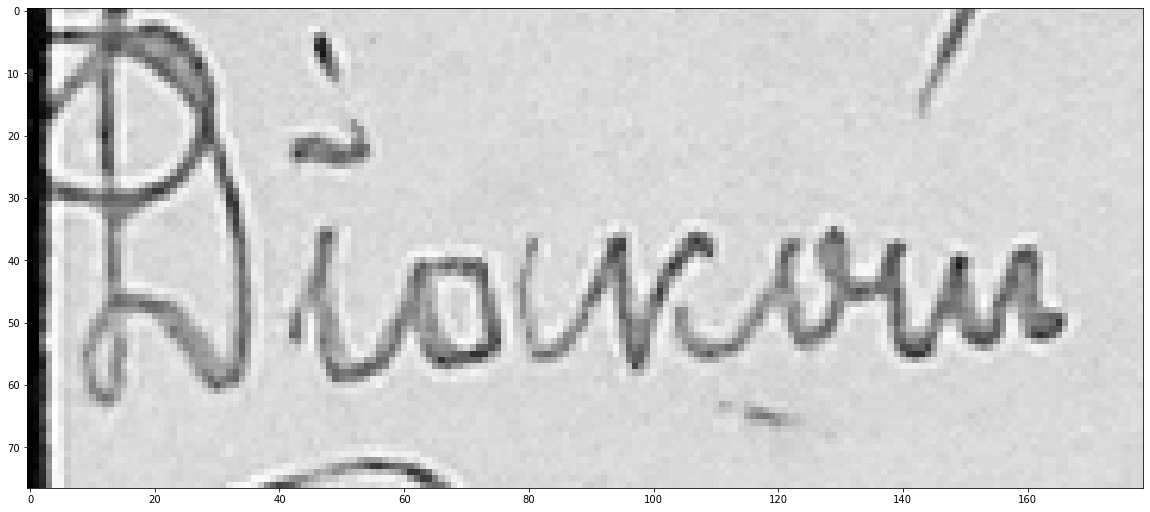

In [52]:
template = cv2.imread('template.png', cv2.IMREAD_GRAYSCALE)
train_image_list = load_all_image_from_path("templates/*", template)
print(image_query.shape)
plot_gray(image_query)

In [53]:
orb = cv2.ORB_create()  # default features is 500

In [ ]:
resultimg_list = []
for image_train in train_image_list:
    # find key point and descriptor
    kp_template, des_template = orb.detectAndCompute(image_train, None)
    kp_img, des_img = orb.detectAndCompute(image_query, None)
    result_image_train = cv2.drawKeypoints(image_train, kp_template, None, flags=0)
    result_image_query = cv2.drawKeypoints(image_query, kp_img, None, flags=0)
    # cv2.imshow("train image",result_image_train)
    # cv2.imshow("query image",result_image_query)
    # cv2.waitKey(0)

    # create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    # Match descriptors.
    matches = bf.match(des_template,des_img)
    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)
    # Draw first 10 matches.
    # img3 = cv2.drawMatches(image_train, kp_template, image_query, kp_img,matches[:1000],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    img3 = cv2.drawMatches(result_image_train, kp_template, result_image_query, kp_img,matches[:1000],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    #resultimg_list.append(img3)
    cv2.imshow("showme",img3)
    cv2.waitKey(0)
    cv2.destroyAllWindows() 
    

In [46]:
len(resultimg_list)

0

images/ГАТО_93_4_64_0639_2_0640_1.jpg
images/ГАТО_93_4_64_0645_2_0646_1.jpg
images/ГАТО_93_4_64_0635_2_0636_1.jpg
images/ГАТО_93_4_64_0646_2_0647_1.jpg
images/ГАТО_93_4_64_0627_2_0628_1.jpg
images/ГАТО_93_4_64_0640_2_0641_1.jpg
images/image.jpg
images/templates
images/ГАТО_93_4_64_0642_2_0643_1.jpg
images/ГАТО_93_4_64_0636_2_0637_1.jpg
images/ГАТО_93_4_64_0643_2_0644_1.jpg
images/ГАТО_93_4_64_0641_2_0642_1.jpg
images/ГАТО_93_4_64_0637_2_0638_1.jpg
images/ГАТО_93_4_64_0626_2_0627_1.jpg
images/template.png
images/ГАТО_93_4_64_0638_2_0639_1.jpg
images/ГАТО_93_4_64_0644_2_0645_1.jpg
